# Pull ESPN Ownership Data

### MSP 9.4.2017


In [1]:
# boilerplate imports

import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import matplotlib as mpl
cmap = cm.gnuplot




In [2]:
# imports for scraping

from bs4 import BeautifulSoup

import requests

import operator



### Change In Ownership

Also set up an archive.

In [3]:

Ownership = {}


for tablenum in range(0,14):

    # cycle through all positions
    r  = requests.get('http://games.espn.com/flb/addeddropped?slotCategoryId='+str(tablenum))

    data = r.text

    soup = BeautifulSoup(data)

    tables = soup.findAll('table')


    for table in tables: 

        headings = [th.get_text() for th in table.find("tr").find_all("th")]
        #print headings


        for row in table.find_all("tr")[1:]: 

        #    sav = [td.find('a') for td in row.find_all("td")]
            sav = [td.get_text() for td in row.find_all("td")]

            #print(sav)
            try:
                w = sav.index(u'\xa0')
            except:
                w = 0
                
            #print(w)

            #print (sav[1].split(',')[0]).strip('*')

            try:
                # block out all non-rankings
                xx = float(sav[0])

                #print sav[0:w]
                #print sav[w+1:len(sav)]

                # added
                #print((sav[1].split(',')[0]).strip('*'))
                Ownership[(sav[1].split(',')[0]).strip('*')] = float(sav[5])

                #dropped
                Ownership[(sav[w+2].split(',')[0]).strip('*')] = float(sav[w+6])

            except:
                pass

            #[u'RK', u'PLAYER, TEAM', u'POS', u'LAST', u'CUR', u'7-DAY +/-']
        

today = datetime.date.today()

f = open('ownership-archive/'+str(today)+'.txt','w')

for index,key in enumerate(Ownership.keys()):
    print >>f,key,Ownership[key]
    
f.close()

In [4]:

Ownership = {}


for tablenum in range(0,18):

    # cycle through all positions
    r  = requests.get('http://games.espn.com/flb/addeddropped?slotCategoryId='+str(tablenum))

    data = r.text

    soup = BeautifulSoup(data)

    tables = soup.findAll('table')


    for table in tables: 

        headings = [th.get_text() for th in table.find("tr").find_all("th")]
        #print headings


        for row in table.find_all("tr")[1:]: 

        #    sav = [td.find('a') for td in row.find_all("td")]
            sav = [td.get_text() for td in row.find_all("td")]

            #print(sav)
            try:
                w = sav.index(u'\xa0')
            except:
                w = 0
                
            #print(w)

            #print (sav[1].split(',')[0]).strip('*')

            try:
                # block out all non-rankings
                xx = float(sav[0])

                #print sav[0:w]
                #print sav[w+1:len(sav)]

                # added
                #print((sav[1].split(',')[0]).strip('*'))
                Ownership[(sav[1].split(',')[0]).strip('*')] = float(sav[4])

                #dropped
                Ownership[(sav[w+2].split(',')[0]).strip('*')] = float(sav[w+5])

            except:
                pass

            #[u'RK', u'PLAYER, TEAM', u'POS', u'LAST', u'CUR', u'7-DAY +/-']
        

today = datetime.date.today()

f = open('ownership-archive/'+str(today)+'_poss.txt','w')

for index,key in enumerate(Ownership.keys()):
    print >>f,key,Ownership[key]
    
f.close()

In [5]:

mos = np.arange(1,13,1)
days = np.arange(1,32,1)

modays = np.array([31.,28.,31.,30.,31.,30.,31.,31.,30.,31.,30.,31.])

PDict = {}
for mo in mos:
    for day in days:
        
        try:
            f = open('ownership-archive/2018-{0:02d}-{1:02d}_poss.txt'.format(int(mo),int(day)))
            print('opened',float(np.sum(modays[0:mo])+day),mo,day)
            
            for line in f:
                q = [d for d in line.split()]
                
                name = str(q[0])+' '+str(q[1])
                
                if name in PDict.keys():
                    PDict[name].append([float(np.sum(modays[0:mo])+day),float(q[-1])])
                else:
                    PDict[name] = []
                    PDict[name].append([float(np.sum(modays[0:mo])+day),float(q[-1])])
                
            
        except:
            pass

('opened', 124.0, 4, 4)
('opened', 125.0, 4, 5)
('opened', 126.0, 4, 6)
('opened', 127.0, 4, 7)
('opened', 128.0, 4, 8)
('opened', 129.0, 4, 9)
('opened', 130.0, 4, 10)
('opened', 131.0, 4, 11)
('opened', 132.0, 4, 12)
('opened', 133.0, 4, 13)
('opened', 134.0, 4, 14)
('opened', 135.0, 4, 15)
('opened', 136.0, 4, 16)
('opened', 137.0, 4, 17)
('opened', 138.0, 4, 18)
('opened', 139.0, 4, 19)
('opened', 140.0, 4, 20)
('opened', 141.0, 4, 21)
('opened', 142.0, 4, 22)
('opened', 143.0, 4, 23)
('opened', 144.0, 4, 24)
('opened', 145.0, 4, 25)
('opened', 146.0, 4, 26)
('opened', 147.0, 4, 27)


529
Eric Thames


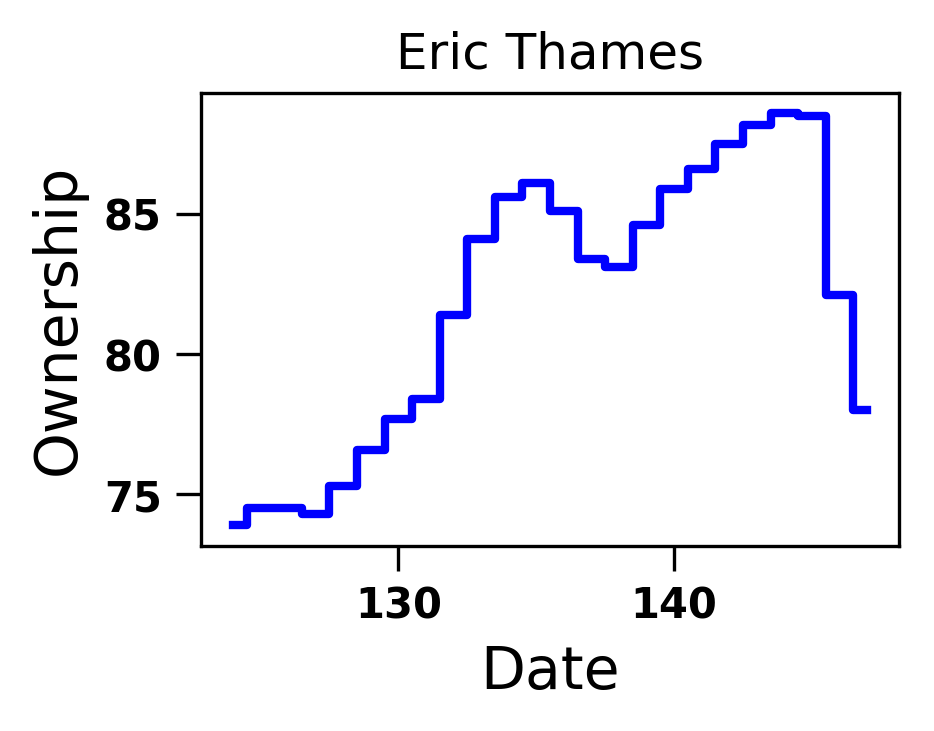

In [20]:
print(len(np.array([key for key in PDict.keys()])))

plt.figure(figsize=(3,2))
player = 'Eric Thames'

for pp in [player]:
    print(pp)
    plt.plot(np.array(PDict[pp])[:,0],np.array(PDict[pp])[:,1],linestyle='steps-mid',color='blue')
    
plt.xlabel('Date',size=14)
plt.ylabel('Ownership',size=14)
plt.title(player)

In [19]:
print(len(np.array([key for key in PDict.keys()])))

for pp in PDict.keys():
    if len((np.array(PDict[pp])[:,1])) > 20:
        print('{0:20s} {1:2d} {2:4.1f} {3:4.1f}'.format(pp,len((np.array(PDict[pp])[:,1])),np.round(np.median(np.array(PDict[pp])[:,1]),1),np.round(np.std(np.array(PDict[pp])[:,1]),1)))

529
Rougned Odor         24 68.2 11.3
Tucker Barnhart      21 11.2  2.9
Mitch Haniger        23 81.3  6.2
Albert Pujols        24 47.6  5.1
J.P. Crawford        22  4.5  1.0
Nick Ahmed           24 18.1  6.2
Josh Reddick         24 83.6  3.3
Matt Chapman         21 88.2  9.9
Brian Anderson       24 29.6  7.4
Marcus Semien        23 26.5  6.8
Eugenio Suarez       23 49.8 10.0
Jed Lowrie           24 45.4 33.2
Tim Beckham          24 16.5  3.5
Yolmer Sanchez       22 12.1  4.1
Steven Souza         24 37.7  5.1
Christian Villanueva 23  7.8 27.9
J.T. Realmuto        24 85.7  2.2
Ian Desmond          22 90.3  4.2
Delino DeShields     23 34.7  6.0
Chris Iannetta       24 50.2  8.0
Gregory Polanco      22 93.9  1.3
Kyle Seager          22 90.2  1.4
Aaron Altherr        22  9.0  3.1
Avisail Garcia       24 68.8 15.2
Luis Valbuena        22 11.0  7.2
Zack Cozart          24 79.7  4.6
Cesar Hernandez      22 35.0 11.3
Freddy Galvis        21 10.9  1.8
Logan Morrison       24 31.0 12.9
Aledmys Di